#  [Projet Machine Learning] Segmentation des clients d'un site de e-commerce avec Python.

### Etape du Projets

##### • Analyse Exploratoire des données

##### • Analyse en Composant Principal (ACP)

##### • Clustering K-Means avec la Methode du Coude

In [ ]:
# Installer yellowbrick si nécessaire
!pip install yellowbrick

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

######  • les données que nous utliliserons sur ce projet guidé provient de [https://archive.ics.uci.edu/dataset/292/wholesale+customers]
l'ensemble des donneés comprend les dépenses annuelles pour different types de produit de ventes au details 

In [108]:
df=pd.read_csv('Wholesale customers data.csv')

In [110]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [10]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

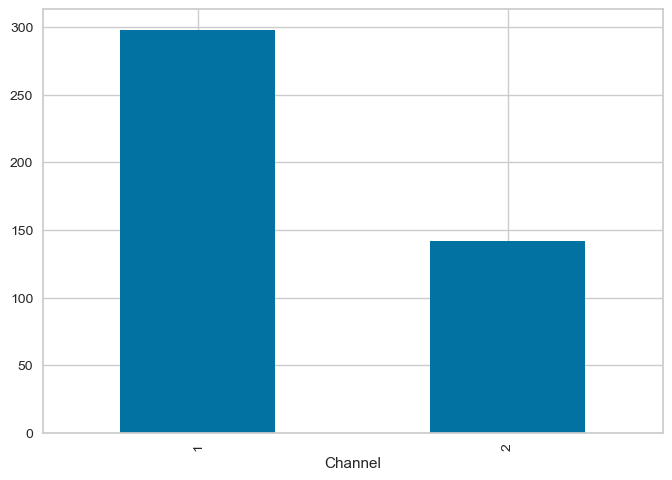

In [50]:
df['Channel'].value_counts().plot(kind ='bar');

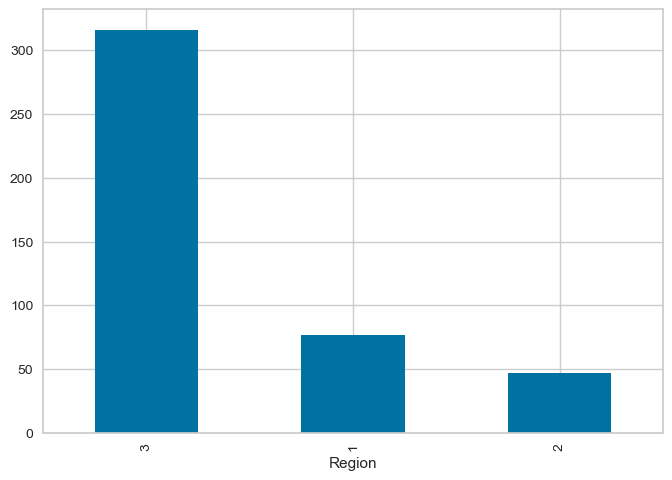

In [52]:
df['Region'].value_counts().plot(kind ='bar');

In [112]:
df = df.rename(columns={'Delicassen':'Delicatassen'}) 

# Mapper les valeurs de la colonne 'Channel' (1 -> 'HoReCa', 2 -> 'retail')
df['Channel'] = df['Channel'].map({1: 'HoReCa', 2: 'retail'}) # retail : vente au détail

# Mapper les valeurs de la colonne 'Region' (1 -> 'lisbon', 2 -> 'porto', 3 -> 'others')
df['Region'] = df['Region'].map({1: 'lisbon', 2: 'porto', 3: 'others'})

In [114]:
df['Region'].value_counts()

Region
others    316
lisbon     77
porto      47
Name: count, dtype: int64

In [119]:
# table de frequence normaliser 
df['Region'].value_counts( normalize = True)

Region
others    0.718182
lisbon    0.175000
porto     0.106818
Name: proportion, dtype: float64

In [121]:
# stockage des nom des colonnes dans une liste 
features = df.columns.tolist()
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatassen']

In [124]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatassen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [128]:
#sauvegardons de df au format csv
df. to_csv('data_processed.csv')

In [130]:
#importation du fichier 'data_processed.csv'
df = pd.read_csv('data_processed.csv' , index_col = 0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatassen
0,retail,others,12669,9656,7561,214,2674,1338
1,retail,others,7057,9810,9568,1762,3293,1776
2,retail,others,6353,8808,7684,2405,3516,7844
3,HoReCa,others,13265,1196,4221,6404,507,1788
4,retail,others,22615,5410,7198,3915,1777,5185


In [132]:
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatassen']

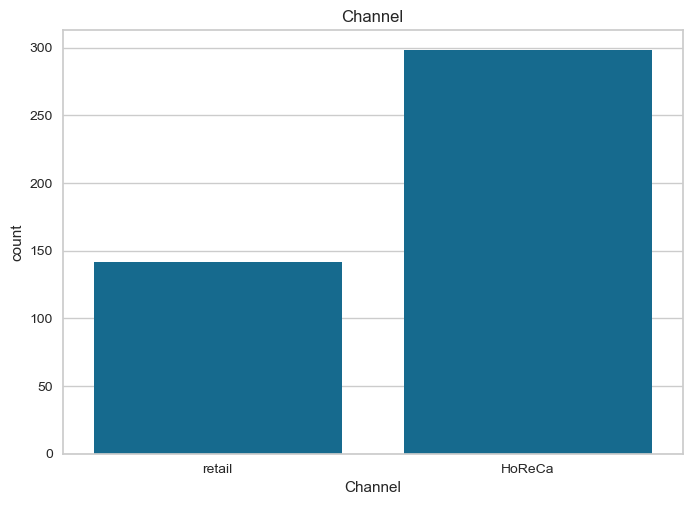

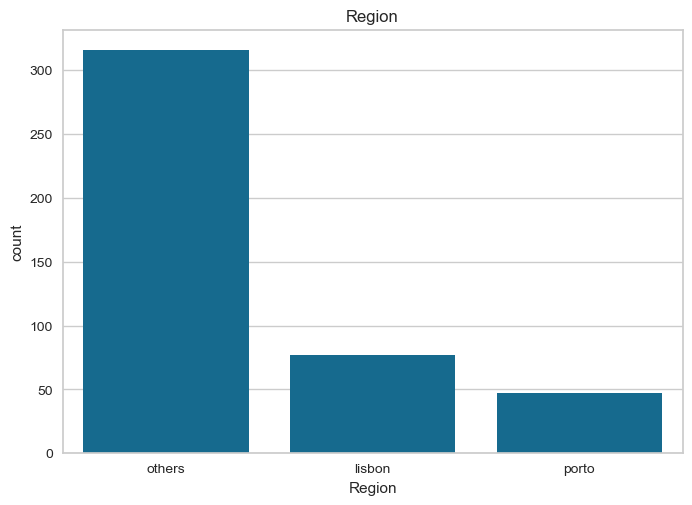

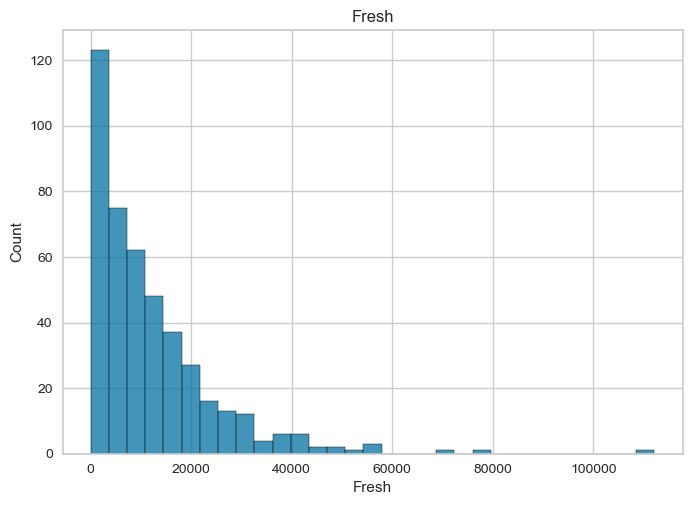

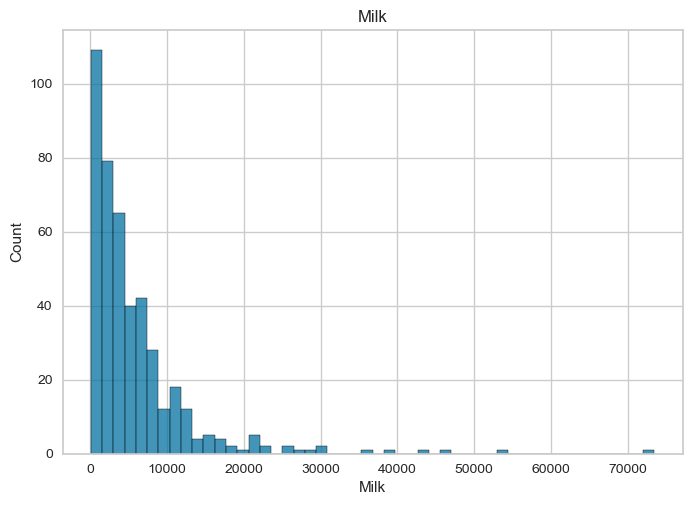

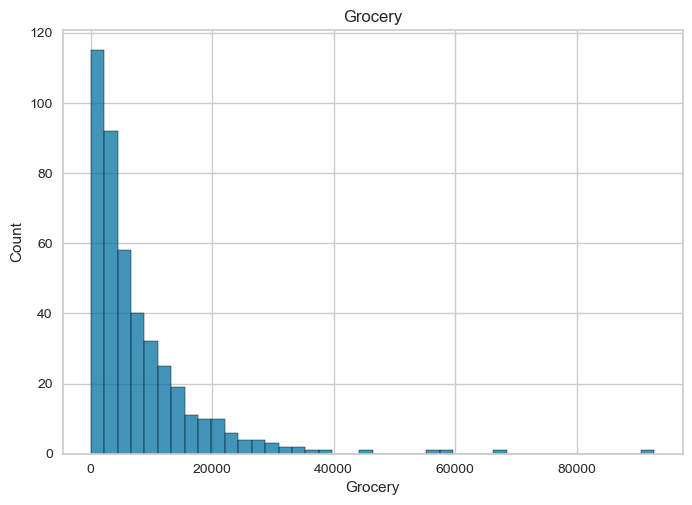

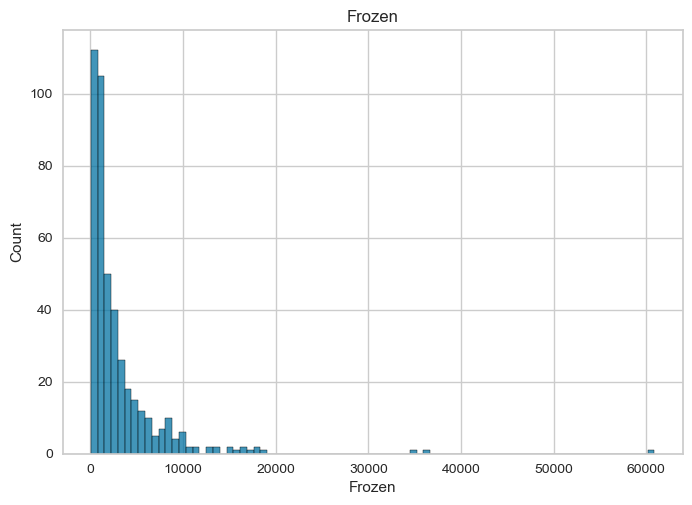

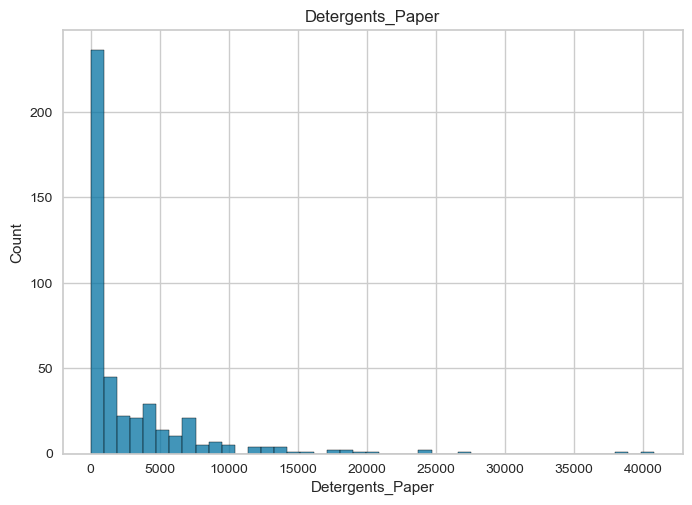

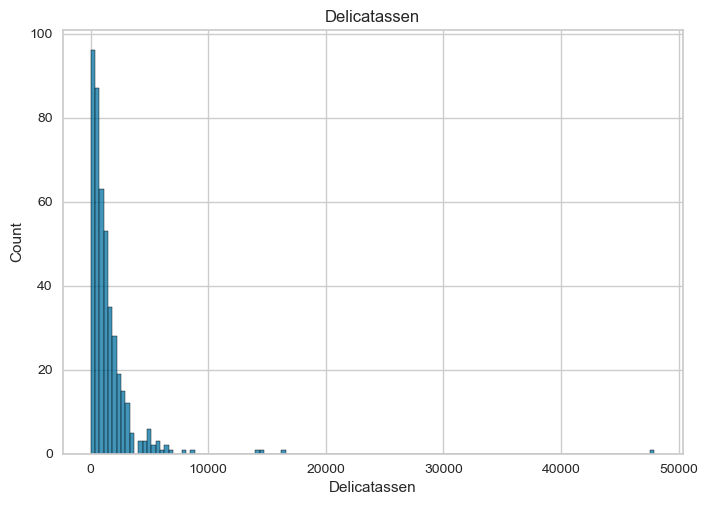

In [138]:
#diagramme en barre et histogrammes

for feature in features:
    if feature in ['Channel', 'Region']:
        sns.countplot(x=df[feature]).set_title(feature)
        plt.show()
    else:
        sns.histplot(df[feature]).set_title(feature)
        plt.show()

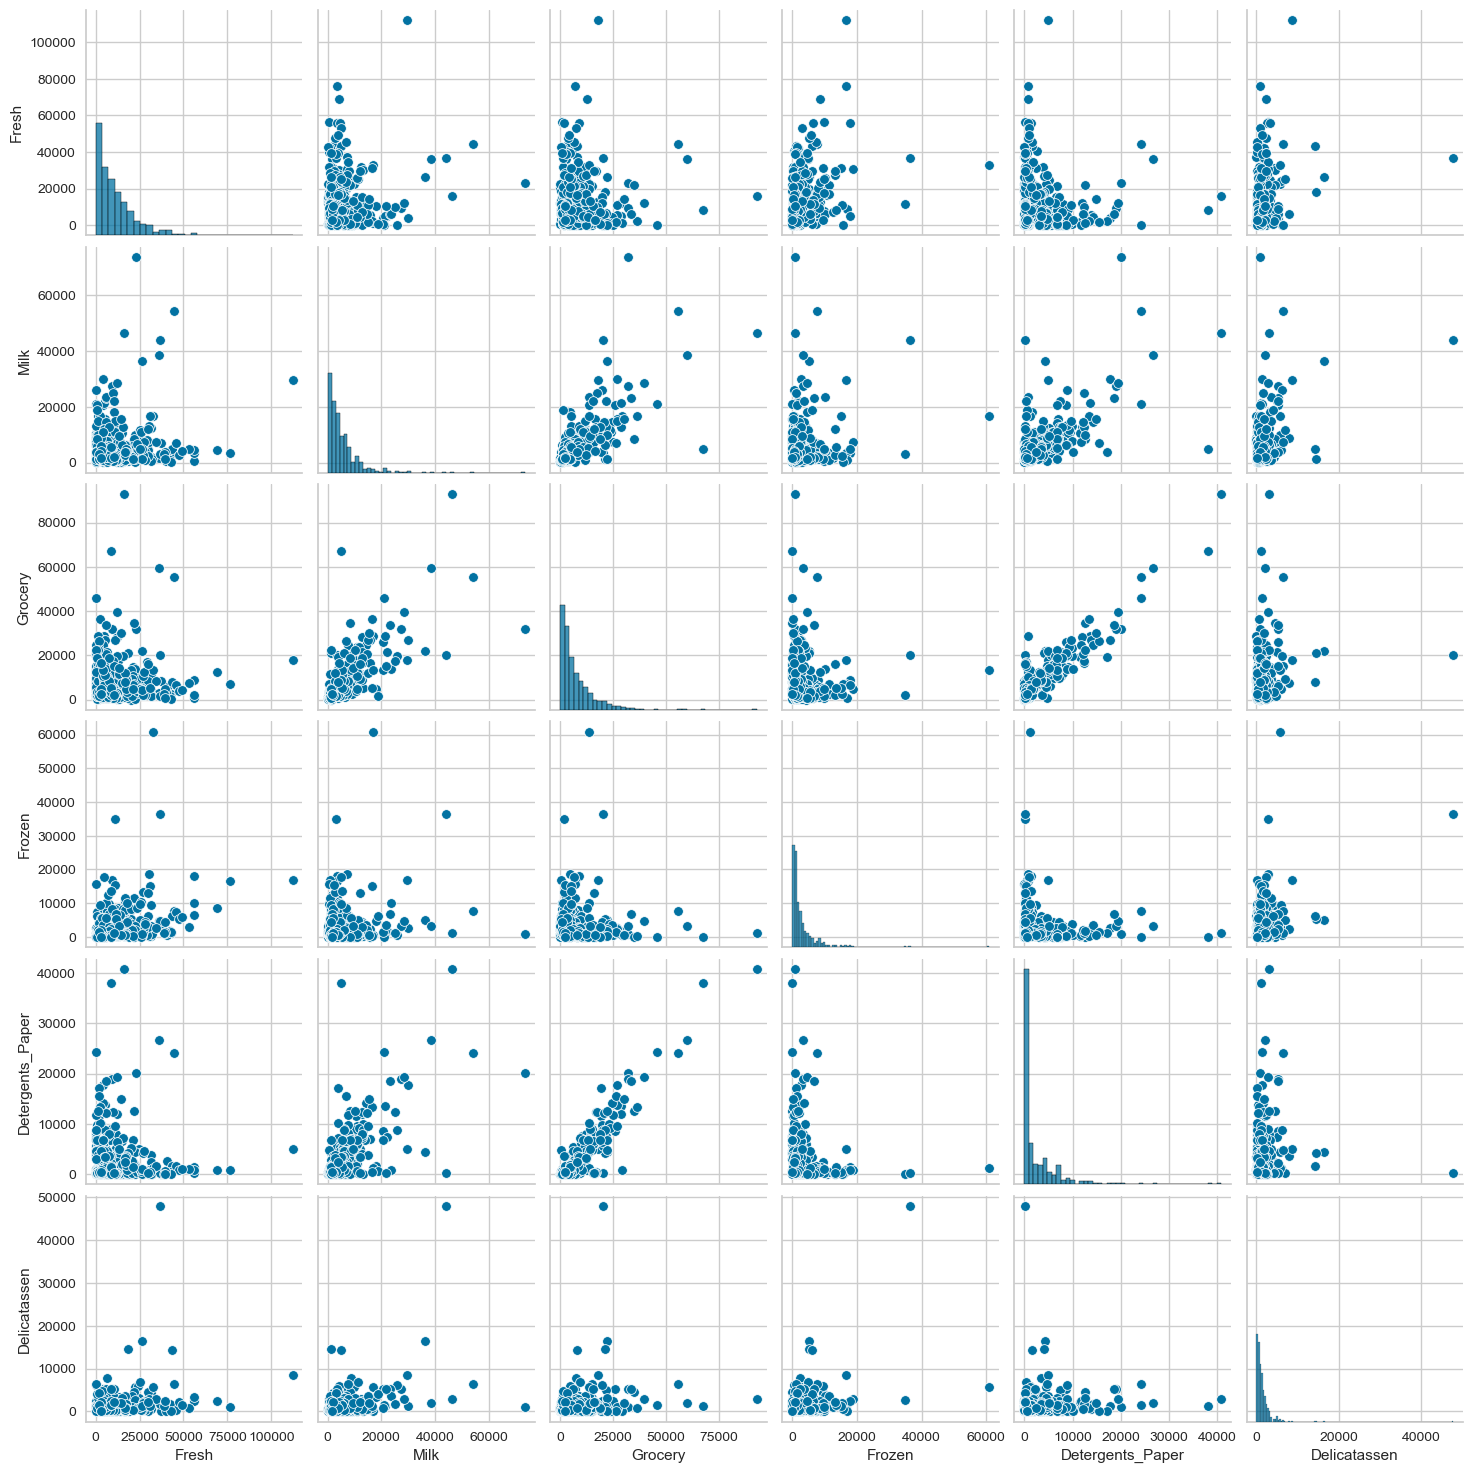

In [140]:
# matrice de visualisation
sns.pairplot(df)

In [134]:
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatassen
0,retail,others,12669,9656,7561,214,2674,1338
1,retail,others,7057,9810,9568,1762,3293,1776


In [144]:
# ACP lineaire
# dataframe des variables numeriques de df 
data = df.drop (['Channel','Region'], axis = 1)
data.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


In [146]:
# standardisation
scaler = StandardScaler()
data = scaler.fit_transform(data)
type(data)

numpy.ndarray

In [148]:
# affichage de data 
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [150]:
# sauvegarde du tableau numpy 
np.save('training_data.npy', data )

In [152]:
# application de L'ACP
pca = PCA (n_components = 2)
res_pca = pca.fit_transform(data)
type(res_pca)

numpy.ndarray

In [158]:
res_pca 

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

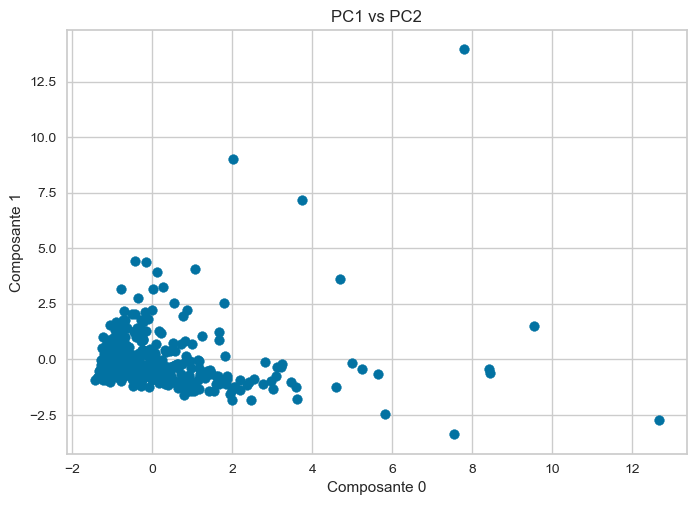

In [160]:
# visualisation des composantes principales
plt.scatter(res_pca[:, 0], res_pca[:, 1])
plt.xlabel("Composante 0")
plt.ylabel("Composante 1")
plt.title("PC1 vs PC2")
plt.show()

In [162]:
# coefficient de correlation de pearson obtenu après ACP
pearsonr(res_pca[:, 0], res_pca[:, 1]) 

PearsonRResult(statistic=-2.0816681711721685e-16, pvalue=0.9999999999999947)

In [164]:
# ACP non-LINEAIRE
# chargement des donneés d'entrainement précedement sauvegardé : 'training _data.npy' nous utiliserons l'algorithme KERNEL de sklean 

data = np.load('training_data.npy')

In [166]:
# KPCA avec noyau 'rbf'
kpca = KernelPCA(n_components=2, kernel='rbf')
res_kpca_rbf = kpca.fit_transform(data)
type(res_kpca_rbf)

numpy.ndarray

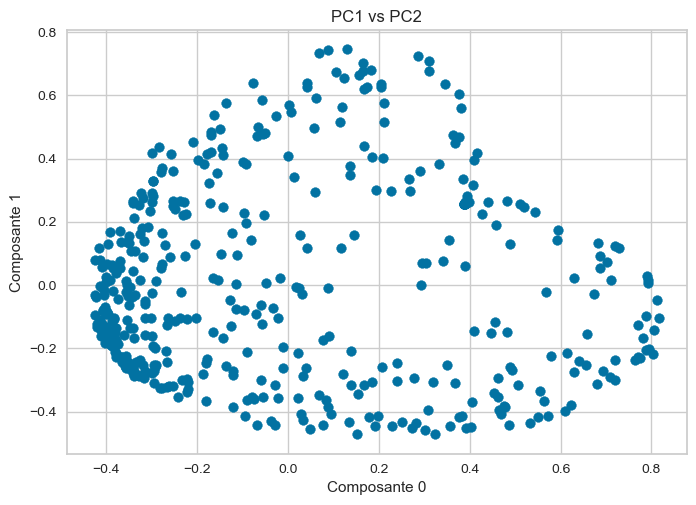

In [168]:
# visualisation du nuage de points des deux composantes 
plt.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1])
plt.xlabel("Composante 0")
plt.ylabel("Composante 1")
plt.title("PC1 vs PC2")
plt.show()

In [170]:
# coefficient de correlation de pearson obtenue après KPCA 
pearsonr(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1]) 

PearsonRResult(statistic=-1.1449174941446927e-16, pvalue=0.9999999999999947)

In [172]:
# comparaison des coefficient de pearson 
pearsonr(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1]) [0] <  pearsonr(res_pca[:, 0], res_pca[:, 1]) [0]

False

In [174]:
# ajout des composantes principales comme colones de df 
df['x_kpca_rbf'] = res_kpca_rbf[:, 0]
df['y_kpca_rbf'] = res_kpca_rbf[:, 1]

In [176]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatassen,x_kpca_rbf,y_kpca_rbf
0,retail,others,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,retail,others,7057,9810,9568,1762,3293,1776,0.185813,-0.307415
2,retail,others,6353,8808,7684,2405,3516,7844,0.341702,0.075048
3,HoReCa,others,13265,1196,4221,6404,507,1788,-0.253304,0.250352
4,retail,others,22615,5410,7198,3915,1777,5185,0.136617,0.375279


## CLUSTERING K-MEANS AVEC LA METHODE COUDE

In [179]:
# CLUSTERING K-MEANS AVEC LA METHODE COUDE 
# clustering avec 5 clusters
# Création du modèle de clustering KMeans avec 5 clusters
cluster_model = KMeans(n_clusters=5)

# Entraînement du modèle sur les données transformées
cluster_model.fit(res_kpca_rbf)

# Prédiction des clusters pour les données
clusters = cluster_model.predict(res_kpca_rbf)

In [183]:
# affichons les clusters
clusters

array([4, 4, 1, 3, 1, 4, 0, 4, 0, 2, 4, 0, 1, 2, 1, 0, 4, 0, 1, 4, 3, 0,
       1, 1, 1, 4, 0, 0, 2, 1, 3, 0, 3, 1, 0, 4, 1, 2, 2, 1, 1, 3, 2, 2,
       4, 2, 2, 1, 4, 2, 0, 4, 1, 2, 3, 0, 1, 2, 0, 4, 4, 1, 4, 2, 0, 1,
       4, 2, 0, 0, 3, 1, 3, 3, 4, 3, 0, 2, 0, 0, 0, 2, 4, 3, 0, 1, 1, 1,
       3, 3, 0, 3, 1, 1, 2, 0, 4, 0, 0, 3, 2, 2, 4, 1, 0, 3, 4, 2, 4, 2,
       0, 2, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 4, 1, 1, 3, 1, 4, 1, 0, 0,
       0, 0, 0, 0, 4, 4, 0, 0, 3, 1, 1, 3, 3, 2, 0, 0, 0, 3, 3, 0, 3, 4,
       0, 2, 2, 3, 4, 2, 4, 0, 3, 2, 4, 2, 4, 0, 0, 0, 2, 2, 4, 2, 0, 4,
       1, 0, 0, 0, 4, 1, 2, 1, 0, 0, 0, 4, 2, 2, 3, 0, 0, 2, 0, 3, 1, 4,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 4, 4, 2, 3, 1, 0, 4, 4, 2, 2, 3, 2, 0,
       3, 4, 3, 0, 0, 0, 3, 0, 0, 3, 3, 4, 3, 0, 3, 0, 0, 3, 0, 1, 1, 3,
       3, 0, 4, 2, 0, 0, 0, 0, 0, 1, 3, 1, 1, 3, 0, 0, 1, 1, 0, 3, 3, 0,
       2, 1, 2, 3, 2, 3, 0, 0, 4, 1, 0, 0, 1, 1, 3, 4, 0, 4, 1, 1, 1, 1,
       0, 3, 3, 1, 0, 0, 0, 2, 3, 0, 3, 4, 4, 0, 0,

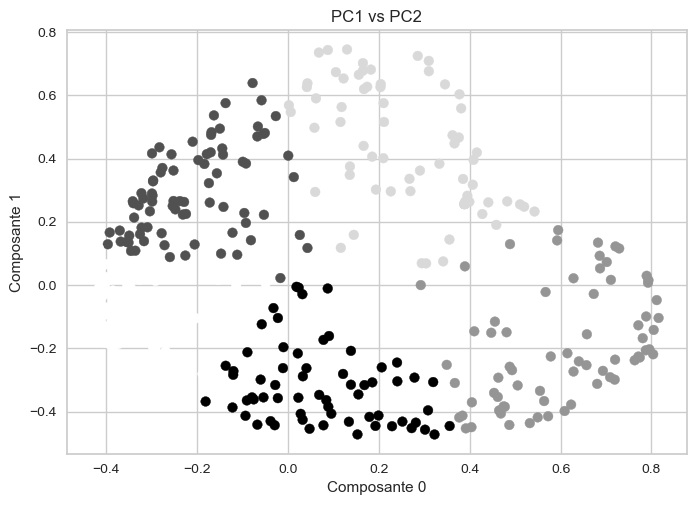

In [185]:
# visualisation des clusters
plt.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1] , c = clusters)
plt.xlabel("Composante 0")
plt.ylabel("Composante 1")
plt.title("PC1 vs PC2")
plt.show()

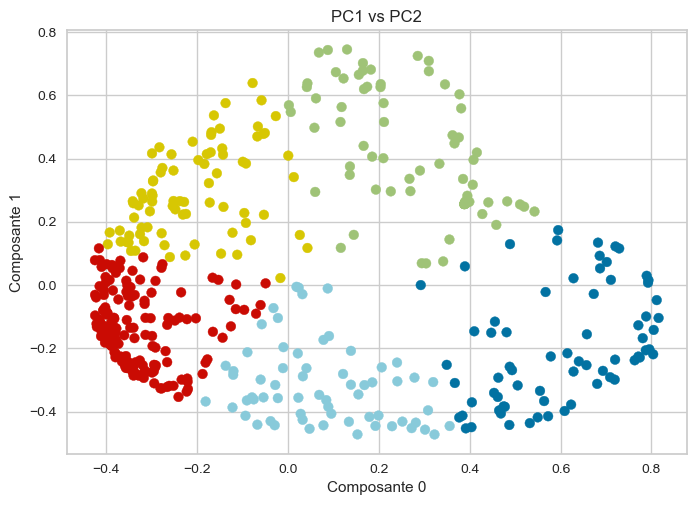

In [187]:
# Autres methodes 
# Liste des couleurs que vous souhaitez utiliser pour chaque cluster
couleurs = ['r', 'g', 'b', 'y', 'c']  # Vous pouvez ajouter d'autres couleurs si nécessaire

# Tracons en utilisant les couleurs définies pour chaque cluster
plt.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1], c=[couleurs[i] for i in clusters])

# Étiquetage des axes et titre du graphique
plt.xlabel("Composante 0")
plt.ylabel("Composante 1")
plt.title("PC1 vs PC2")

# Affichage du graphique
plt.show()

##### intallation de yellowbrick
##### pip install _uyellowbrick

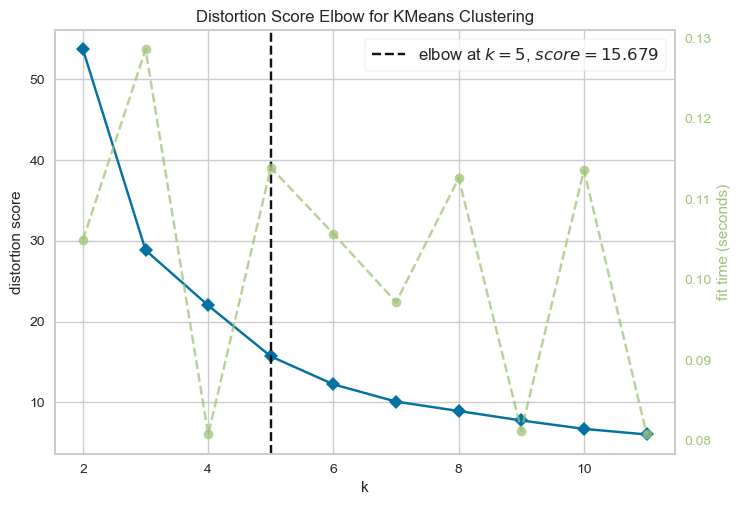

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [191]:
# methode de coude 
# Création d'une instance de KMeans avec un nombre maximum de clusters pouvant aller de 2 à 12
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 12))

# Ajustement du visualiseur aux données transformées
visualizer.fit(res_kpca_rbf)

# Affichage du graphique
visualizer.show()

In [193]:
# ajout des cluster a df et sauvegarder au format csv
df['cluster_kpca_rbf'] = clusters
df.to_csv('data_with_clusters.csv')

In [195]:
# chargement des données
df= pd.read_csv('data_with_clusters.csv', index_col = 0 )

In [197]:
# 5 premieres obsservations
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatassen,x_kpca_rbf,y_kpca_rbf,cluster_kpca_rbf
0,retail,others,12669,9656,7561,214,2674,1338,0.078374,-0.173115,4
1,retail,others,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,4
2,retail,others,6353,8808,7684,2405,3516,7844,0.341702,0.075048,1
3,HoReCa,others,13265,1196,4221,6404,507,1788,-0.253304,0.250352,3
4,retail,others,22615,5410,7198,3915,1777,5185,0.136617,0.375279,1


In [199]:
df['cluster_kpca_rbf'].unique()

array([4, 1, 3, 0, 2], dtype=int64)

In [201]:
# Vérifions les types de données de vos colonnes
print(df.dtypes)

# Sélection uniquement les colonnes numériques pour l'opération groupby
numeric_features = df.select_dtypes(include=['number']).columns

# Effectuons l'opération groupby uniquement sur les colonnes numériques
centroids = df.groupby('cluster_kpca_rbf')[numeric_features].mean()

print(centroids)

Channel              object
Region               object
Fresh                 int64
Milk                  int64
Grocery               int64
Frozen                int64
Detergents_Paper      int64
Delicatassen          int64
x_kpca_rbf          float64
y_kpca_rbf          float64
cluster_kpca_rbf      int64
dtype: object
                         Fresh          Milk       Grocery       Frozen  \
cluster_kpca_rbf                                                          
0                  6487.745098   2234.000000   2804.973856  1752.339869   
1                 29583.671233  11270.945205  12885.630137  7836.178082   
2                  5361.828571  11311.314286  18649.557143  1366.828571   
3                 17619.512500   2376.750000   3190.412500  4286.500000   
4                  5359.515625   6310.062500   8875.750000  1139.109375   

                  Detergents_Paper  Delicatassen  x_kpca_rbf  y_kpca_rbf  \
cluster_kpca_rbf                                                           
